<h1><center> Analysis of urban versus rural living</center></h1>
![](https://sustainabilityatspu.files.wordpress.com/2014/01/urban-and-rural.jpg?w=1097&h=784)

In [59]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
from scipy import stats

#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
young = pd.read_csv('../../datasets/from_our_childhood.csv')

### Estadisticas descriptivas

En la siguiente sección mostraremos algunas estadísticas descriptivas, con sus respectivos gráficos, sobre las variables: Edad, Peso y Género. Se realizará un análisis de outliers como así también se analizará la correlación entre estas variables.

In [44]:
# Media, Mediana, Moda y desviación estandard para la variable "Peso", independiente del género.

weight_without_na = young[['Weight']].dropna()
weight_mean = np.mean(weight_without_na).Weight
weight_median = np.median(weight_without_na)
weight_mode= stats.mode(weight_without_na)
weight_sd = np.std(weight_without_na).Weight

print(
    '''
    Variable Peso \n
    \t Media: {0}\n
    \t Mediana: {1}\n
    \t Moda: {2} ({3} repeticiones) \n
    \t Desviación estandard: {4}
    '''.format(
        weight_mean,
        weight_median,
        weight_mode.mode,
        weight_mode.count,
        weight_sd
    )
)


    Variable Peso 

    	 Media: 66.40505050505051

    	 Mediana: 64.0

    	 Moda: [[60.]] ([[76]] repeticiones) 

    	 Desviación estandard: 13.832569338065822
    


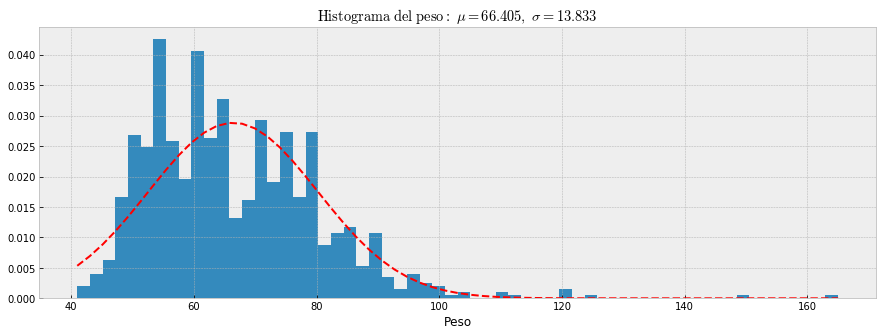

In [77]:
def distribution_by_weigth(**kwargs):
    _, ax = plt.subplots(figsize=(15, 5))
    plt.xlabel('Peso')
    plt.title(r'$\mathrm{Histograma\ del\ peso:}\ \mu=%.3f,\ \sigma=%.3f$' %(weight_mean, weight_sd))
    plt.grid(True)

    n, bins, patches = plt.hist(weight_without_na.Weight, **kwargs)
    
    # Agregamos una linea que representa el mejor ajuste a los datos
    # utilizando los valores de mu y sigma obtenidos anteriormente
    y = mlab.normpdf(bins, weight_mean, weight_sd)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    plt.show()

    
# Histograma del peso con 60 bins y linea de ajuste.
distribution_by_weigth(**{'bins': 60, 'normed': True})



In [78]:
# Media, Mediana, Moda y desviación estandard para la variable "Edad", independiente del género.

age_without_na = young[['Age']].dropna()
age_mean = np.mean(age_without_na).Age
age_median = np.median(age_without_na)
age_mode= stats.mode(age_without_na)
age_sd = np.std(age_without_na).Age

print(
    '''
    Variable Edad \n
    \t Media: {0}\n
    \t Mediana: {1}\n
    \t Moda: {2} ({3} repeticiones) \n
    \t Desviación estandard: {4}
    '''.format(
        age_mean,
        age_median,
        age_mode.mode,
        age_mode.count,
        age_sd
    )
)


    Variable Edad 

    	 Media: 20.43369890329013

    	 Mediana: 20.0

    	 Moda: [[19.]] ([[210]] repeticiones) 

    	 Desviación estandard: 2.8274295576298125
    


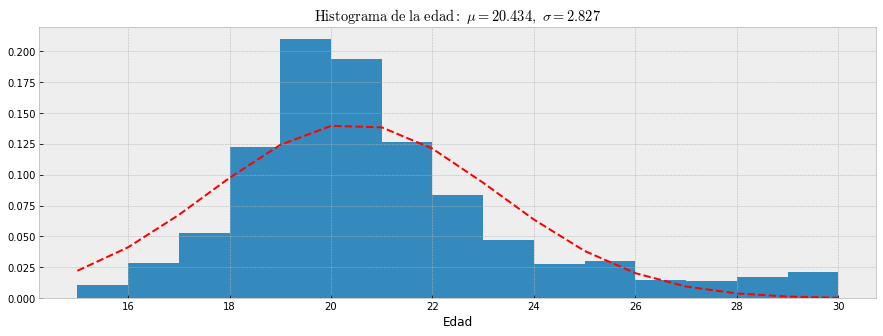

In [103]:
def distribution_by_age(**kwargs):
    _, ax = plt.subplots(figsize=(15, 5))
    plt.xlabel('Edad')
    plt.title(r'$\mathrm{Histograma\ de\ la\ edad:}\ \mu=%.3f,\ \sigma=%.3f$' %(age_mean, age_sd))
    plt.grid(True)

    n, bins, patches = plt.hist(age_without_na.Age, **kwargs)
    
    # Agregamos una linea que representa el mejor ajuste a los datos
    # utilizando los valores de mu y sigma obtenidos anteriormente
    y = mlab.normpdf(bins, age_mean, age_sd)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    plt.show()

    
# Histograma de la edad con 15 bins y linea de ajuste.
distribution_by_age(**{'bins': 15, 'normed': True})


#### Análisis de la distribución del peso y la edad

Ambos histogramas nos muestran que tanto el peso como la edad responden a una distribución normal.

En el caso del peso $\mu: 66.40$ y $\sigma: 13.83$  

En el caso de la edad $\mu: 20.434$ y $\sigma: 2.837$